In [615]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [616]:
df = pd.read_csv('train (1).csv', usecols=['Age', 'Fare', 'Survived'])

In [617]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [618]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/var/folders/q2/htj21g2926s1pdgzj1n1__fw0000gn/T/ipykernel_50866/1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [619]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [620]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [621]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

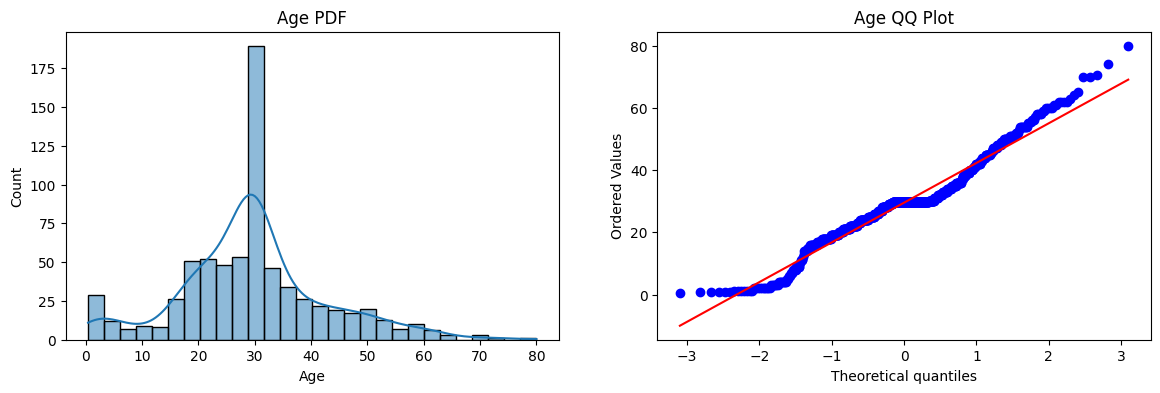

In [622]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')


plt.show()

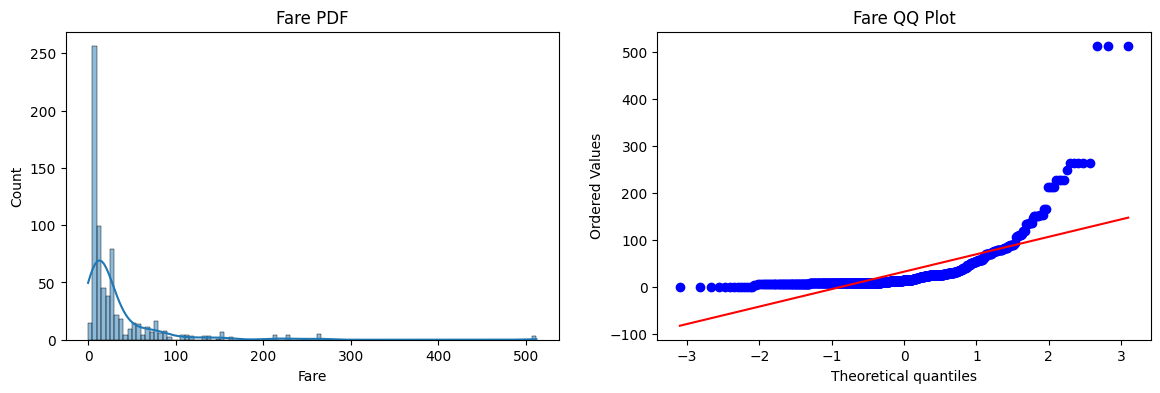

In [623]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [624]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [625]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


/Users/jomman/jupyter_envs/jupyter_venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/jomman/jupyter_envs/jupyter_venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/jomman/jupyter_envs/jupyter_venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


In [626]:
trf = FunctionTransformer(func=np.log1p)


In [627]:

x_train_transform = trf.fit_transform(x_train)
x_test_tranform = trf.transform(x_test)

In [628]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transform, y_train)
clf2.fit(x_train_transform, y_train)

y_pred = clf.predict(x_test_tranform)
y_pred2 = clf2.predict(x_test_tranform)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


/Users/jomman/jupyter_envs/jupyter_venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/jomman/jupyter_envs/jupyter_venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/jomman/jupyter_envs/jupyter_venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
